# Vision Zero, Chicago, modeling car crashes with injuries.

# Overview
I was hired by a government agency CMAP (Chicago Metropolitan Agency for Planning) to create a model which predicts injuries during car crashes based on information collected by Chicago Police Department (CPD). I  concluded that there are many features that determine the oucome of car crash(overall 200 features, only 31 were used in our model), some of them: type of crash , day, season, time, type of crash, are there injuried people, phyesical imparement factors(drugs, alchogol, distraction etc), speed limit, weather, lightning and road conditions etc .

To acheive my goal, I trained more than 100 models and tuned hyperparameters, model types that were used: 
- LogisticRegression
- KNN
- Naive Bayes(different type) 
- DecisionTree
- Random Forest
- ADA Boost
- Gradient boost
- XGB Classifier


# Business Understanding
Our stakeholder wants to understand what factors of crash influence on injury outcome as the last possible outcome. They perfectly understand that car crashes will be happening but they want to reduce the number of injuries because individual health prevails under public mobility. 

# Data

1) Database Traffic Crashes - Crashes. Years: 2017 - now
Provided by City of Chicago

https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if 

2) Database Traffic Crashes - People. Years: 2017 - now
Provided by City of Chicago

https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

3) Database Traffic Crashes - Vehicles. Years: 2017 - now
Provided by City of Chicago  

https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3

##### In my research I used data for 2021 year.

# Metrics
#### Our project will answer following question:
Can we predict that customer will subsribe for bank product?

#### Hypothesis:
H0 - Customer will not subscribe

HA - There is a significant evidence that customer will subscriber to our services

#### TP, TN, FP, FN definition
TP - We predicted that customer subscribe and it happened

TN - We predicted that customer wouldn't not subscribe and it didn't happened

FP - We predicted that customer subscribe, but they didn't.

FN - We predicted that customer not subscribe but they subscribed. 


#### Metrics used  
To compare models we will focus on 2 major metrics:

Accuracy - how good we can predict TP and TN. General metrics that will show model performance.

Recall - We work under assumption that the cost of contact is diminishiely low compare to the possible profit of customer signed. So we are interested in catching as much as possible possible signed up customers and minimizing FN. I will use recall as the second metric



# Data Understanding
#### Sources of data:
1) Database Traffic Crashes - Crashes. Years: 2017 - now
Covers: Main characteristics of car crash.
Provided by City of Chicago 
https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

2) Database Traffic Crashes - People. Years: 2017 - now
Covers: People/drivers involved in car crash.
Provided by City of Chicago 
https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

3) Database Traffic Crashes - Vehicles. Years: 2017 - now
Covers: Vehicles involved in car crash.
Provided by City of Chicago 
https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3

#### Main dataset contains the following columns:
'CRASH_RECORD_ID',  - unique ID related to crash 



# Data Cleaning
### Importing required modules

In [1]:
# Work with data
import pandas as pd
import numpy as np
from scipy import stats as stats

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#Modeling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, KFold, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_curve, plot_roc_curve, roc_auc_score, accuracy_score, recall_score, f1_score
from xgboost import XGBClassifier

#Other
import pickle
import time
import gzip
from zipfile import ZipFile


from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning
simplefilter(action='ignore', category= FutureWarning)
simplefilter(action='ignore', category= ConvergenceWarning)
simplefilter(action='ignore', category= FitFailedWarning)
simplefilter(action='ignore', category= UserWarning)




  




### Importing data

In [2]:
df = pd.read_csv("./data/Casestudy Data.csv")

##### 1) Data Inspection

In [3]:
# Check how data looks
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no


In [4]:
# Check the shape of data
df.shape

(41188, 21)

In [317]:
# Check numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
cons.price.idx,41188.0,93.575679,0.578851,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100
y,41188.0,0.112654,0.316173,0.000,0.000,0.000,0.000,1.000


In [318]:
# How many values are missing
df.isna().sum()

job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
y                 0
new_age           0
dtype: int64

In [7]:
# Check how many uniue values and normalize missing data for better perception
def checker(df):
    for column in df.columns:
        print(f"{round((1-df[column].isna().sum()/len(df[column]))*100, 2)}% of data exist, N of unique parameters: {len(df[column].value_counts().keys())} in column {column}")

print("Dataset general information:")        
checker(df)

Dataset general information:
90.91% of data exist, N of unique parameters: 78 in column age
100.0% of data exist, N of unique parameters: 12 in column job
100.0% of data exist, N of unique parameters: 4 in column marital
100.0% of data exist, N of unique parameters: 8 in column education
100.0% of data exist, N of unique parameters: 3 in column default
100.0% of data exist, N of unique parameters: 3 in column housing
100.0% of data exist, N of unique parameters: 3 in column loan
100.0% of data exist, N of unique parameters: 2 in column contact
100.0% of data exist, N of unique parameters: 10 in column month
100.0% of data exist, N of unique parameters: 5 in column day_of_week
100.0% of data exist, N of unique parameters: 1544 in column duration
100.0% of data exist, N of unique parameters: 42 in column campaign
100.0% of data exist, N of unique parameters: 27 in column pdays
100.0% of data exist, N of unique parameters: 8 in column previous
100.0% of data exist, N of unique parameters:

In [8]:
for column in df.columns:
        print("-------------")
        print(f"Column : {column}")
        print(df[column].value_counts().head(10))

-------------
Column : age
31.0    1782
33.0    1687
32.0    1672
36.0    1625
35.0    1598
34.0    1577
30.0    1570
37.0    1350
29.0    1327
39.0    1295
Name: age, dtype: int64
-------------
Column : job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
Name: job, dtype: int64
-------------
Column : marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
-------------
Column : education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
-------------
Column : default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
--

In [320]:
(df["age"]).hist(bins=20)

KeyError: 'age'

In [321]:
df["cons.price.idx"].value_counts(normalize=True)

93.994    0.188477
93.918    0.162305
92.893    0.140672
93.444    0.125643
94.465    0.106196
93.200    0.087793
93.075    0.059678
92.201    0.018646
92.963    0.017335
92.431    0.010853
92.649    0.008668
94.215    0.007575
94.199    0.007332
92.843    0.006895
92.379    0.006531
93.369    0.006410
94.027    0.005657
94.055    0.005536
93.876    0.005147
94.601    0.004977
92.469    0.004346
93.749    0.004225
92.713    0.004176
94.767    0.003108
93.798    0.001627
92.756    0.000194
Name: cons.price.idx, dtype: float64

<AxesSubplot:>

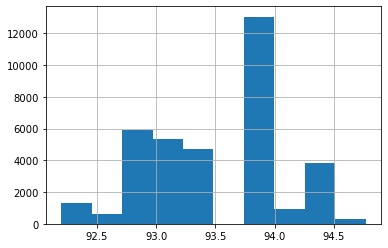

In [11]:
df["cons.price.idx"].hist(bins = 10)

In [12]:
# Check when both rows have missing values.
df[df.age.isna()]["cons.price.idx"].isna().value_counts()
# Both have missing values in rare cases.

False    3268
True      476
Name: cons.price.idx, dtype: int64

In [13]:
# Check when both rows have missing values and outcome of these marketing campaigns. 
print("Normal data, marketing campaign outcome:")
print(df["y"].value_counts(normalize=True))
print("Both columns missing data, marketing campaign outcome:")
print(df[(df.age.isna() & df["cons.price.idx"].isna())]["y"].value_counts(normalize=True))

Normal data, marketing campaign outcome:
no     0.887346
yes    0.112654
Name: y, dtype: float64
Both columns missing data, marketing campaign outcome:
no     0.878151
yes    0.121849
Name: y, dtype: float64


### Data Engineering

##### Outcome

In [14]:
# Change outcome type
df["y"] = df["y"].map({"yes":1, "no":0})

##### Missing values

In [322]:
# Consumer price index
df["cons.price.idx"].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     768
92.963     714
92.431     447
92.649     357
94.215     312
94.199     302
92.843     284
92.379     269
93.369     264
94.027     233
94.055     228
93.876     212
94.601     205
92.469     179
93.749     174
92.713     172
94.767     128
93.798      67
92.756       8
Name: cons.price.idx, dtype: int64

In [323]:
df["cons.price.idx"][7750:7800]

7750    93.994
7751    93.994
7752    93.994
7753    93.994
7754    93.994
7755    93.994
7756    93.994
7757    93.994
7758    93.994
7759    93.994
7760    93.994
7761    93.994
7762    93.994
7763    94.465
7764    94.465
7765    94.465
7766    94.465
7767    94.465
7768    94.465
7769    94.465
7770    94.465
7771    94.465
7772    94.465
7773    94.465
7774    94.465
7775    94.465
7776    94.465
7777    94.465
7778    94.465
7779    94.465
7780    94.465
7781    94.465
7782    94.465
7783    94.465
7784    94.465
7785    94.465
7786    94.465
7787    94.465
7788    94.465
7789    94.465
7790    94.465
7791    94.465
7792    94.465
7793    94.465
7794    94.465
7795    94.465
7796    94.465
7797    94.465
7798    94.465
7799    94.465
Name: cons.price.idx, dtype: float64

In [324]:
sum(list(df["cons.price.idx"][df["cons.price.idx"].isna()].index < 20000))

# Consumer price index is filled after constant period of time and stay constant in fixed time frame
# As we can see our records also filled in timely manner.
# Missing values of consumer price index are randomly situated in our records.
# We have reported 10 month, and 26 unique values of consumer price index, that doesn't correspond to weekly, biweekly or monthly change
# We will use bfill strategy to fill NA values

0

In [18]:
df["cons.price.idx"].fillna(method = "bfill", inplace = True)

In [19]:
df["cons.price.idx"][7750:7800]

7750    93.994
7751    93.994
7752    93.994
7753    93.994
7754    93.994
7755    93.994
7756    93.994
7757    93.994
7758    93.994
7759    93.994
7760    93.994
7761    93.994
7762    93.994
7763    94.465
7764    94.465
7765    94.465
7766    94.465
7767    94.465
7768    94.465
7769    94.465
7770    94.465
7771    94.465
7772    94.465
7773    94.465
7774    94.465
7775    94.465
7776    94.465
7777    94.465
7778    94.465
7779    94.465
7780    94.465
7781    94.465
7782    94.465
7783    94.465
7784    94.465
7785    94.465
7786    94.465
7787    94.465
7788    94.465
7789    94.465
7790    94.465
7791    94.465
7792    94.465
7793    94.465
7794    94.465
7795    94.465
7796    94.465
7797    94.465
7798    94.465
7799    94.465
Name: cons.price.idx, dtype: float64

In [20]:
# Age
# Check for outliers
df["age"]

In [21]:
# Age bins:
bins_age = list(range(15,90,5))
df["new_age"] = pd.cut(x = df.age, bins = bins_age)
# Fill missing age with new category - Unknown
df["new_age"] = df["new_age"].cat.add_categories("Unknown").fillna("Unknown").astype("string").astype("object")
# Drop old age 
df.drop("age", axis = 1, inplace = True)


In [22]:
print(f"The number of missing values - {df.isna().sum().sum()}")
print("------------------------")

The number of missing values - 0
------------------------


##### Multicollinearity issues.


<AxesSubplot:>

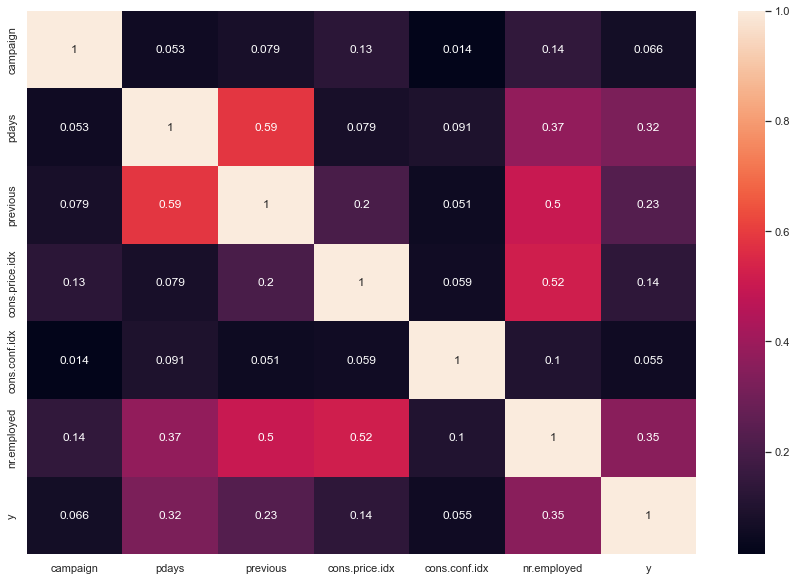

In [325]:
fig,axs = plt.subplots(1,1,figsize = (15,10))
sns.heatmap(np.abs(df.corr()), annot = True, ax = axs)

<AxesSubplot:>

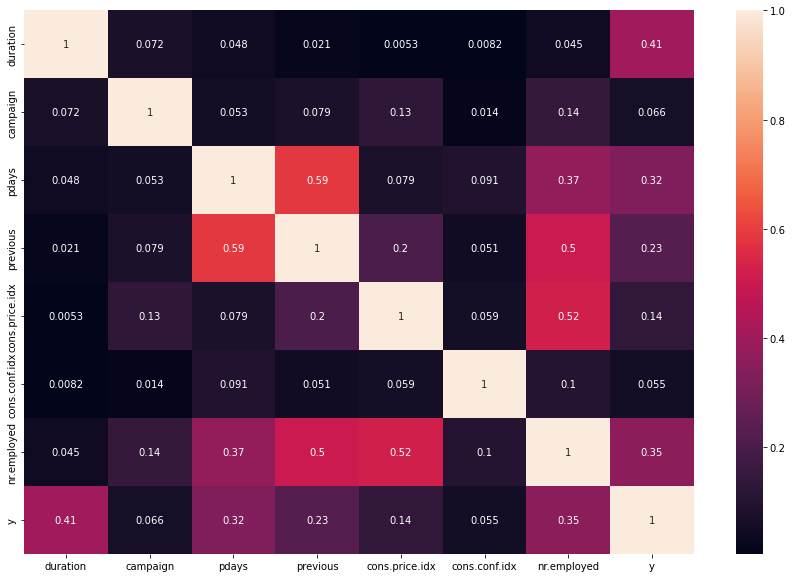

In [24]:
# High correlation between eurobor3m, nr.employed, emp.var.rate, cons.price.ind. 
# Remove some of them to takle multicollinearity. 
list_to_drop= ["emp.var.rate", "euribor3m"]
df = df.drop(list_to_drop, axis = 1)
fig,axs = plt.subplots(1,1,figsize = (15,10))
sns.heatmap(np.abs(df.corr()), annot = True, ax = axs)

In [25]:
# Drop duration
# # Shoud be removed. 
# # Duration - log transformation + remove 0 values.
df.drop("duration", axis = 1, inplace = True)

##### column investigation

In [26]:
# Number of contacts
np.cumsum(df['campaign'].value_counts())/len(df['campaign'])

1     0.428329
2     0.684957
3     0.814630
4     0.878994
5     0.917816
6     0.941585
7     0.956856
8     0.966568
9     0.973439
10    0.978902
11    0.983199
12    0.986234
13    0.988468
14    0.990143
17    0.991551
16    0.992789
15    0.994027
18    0.994829
20    0.995557
19    0.996188
21    0.996771
22    0.997184
23    0.997572
24    0.997936
27    0.998203
29    0.998446
28    0.998640
26    0.998835
25    0.999029
31    0.999199
30    0.999369
35    0.999490
32    0.999587
33    0.999684
34    0.999757
42    0.999806
40    0.999854
43    0.999903
56    0.999927
39    0.999951
41    0.999976
37    1.000000
Name: campaign, dtype: float64

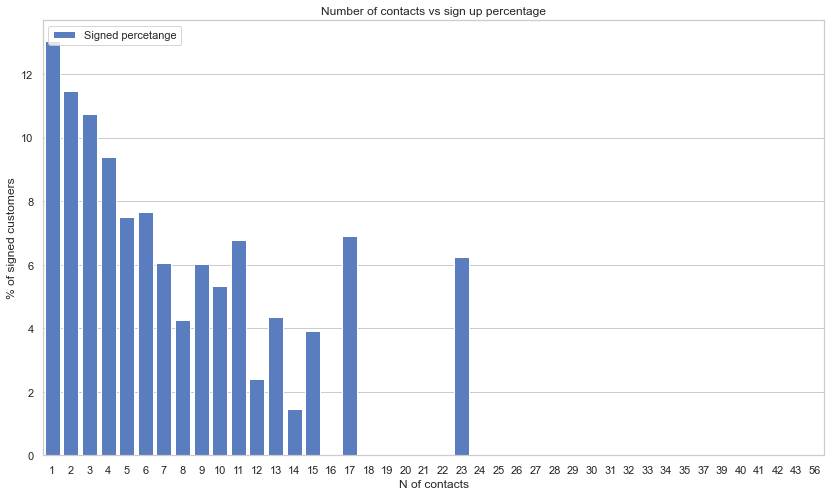

In [27]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 8))
x_labels = list(df["campaign"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("campaign")["y"].sum().index, 
            y =  df.groupby("campaign")["y"].sum()/df.groupby("campaign")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("N of contacts")
ax.set_ylabel("% of signed customers")
ax.set_title("Number of contacts vs sign up percentage")
plt.savefig("./img/EDA2.png")

In [28]:
# Pdays
df["pdays"].value_counts(normalize = True)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
22     0.000073
19     0.000073
21     0.000049
25     0.000024
26     0.000024
27     0.000024
20     0.000024
Name: pdays, dtype: float64

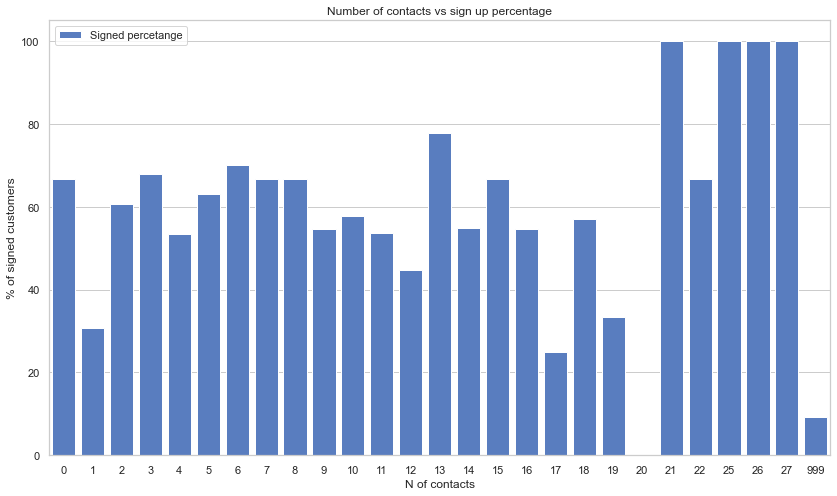

In [29]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 8))
x_labels = list(df["campaign"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("pdays")["y"].sum().index, 
            y =  df.groupby("pdays")["y"].sum()/df.groupby("pdays")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("N of contacts")
ax.set_ylabel("% of signed customers")
ax.set_title("Number of contacts vs sign up percentage")
plt.savefig("./img/EDA2.png")

In [30]:
# Pdays

df["previous"].value_counts(normalize = True)

0    0.863431
1    0.110736
2    0.018306
3    0.005244
4    0.001700
5    0.000437
6    0.000121
7    0.000024
Name: previous, dtype: float64

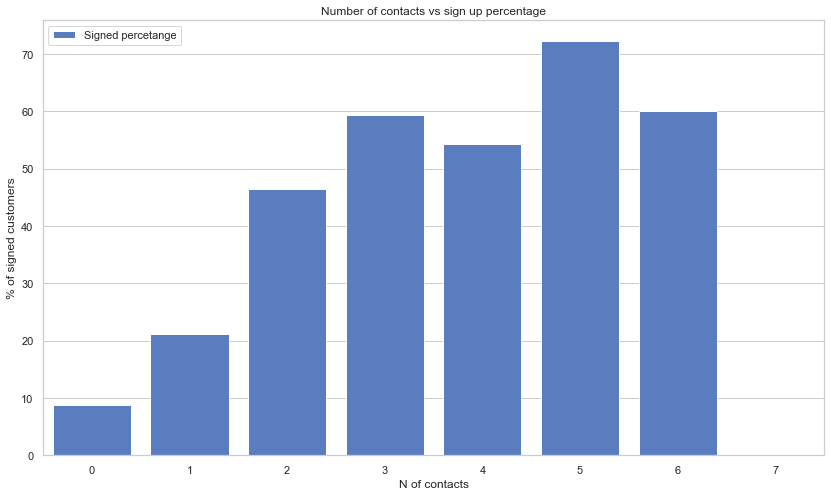

In [31]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 8))
x_labels = list(df["campaign"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("previous")["y"].sum().index, 
            y =  df.groupby("previous")["y"].sum()/df.groupby("previous")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("N of contacts")
ax.set_ylabel("% of signed customers")
ax.set_title("Number of contacts vs sign up percentage")
plt.savefig("./img/EDA2.png")

In [32]:
# poutcome
df["poutcome"].value_counts(normalize = True)

nonexistent    0.863431
failure        0.103234
success        0.033335
Name: poutcome, dtype: float64

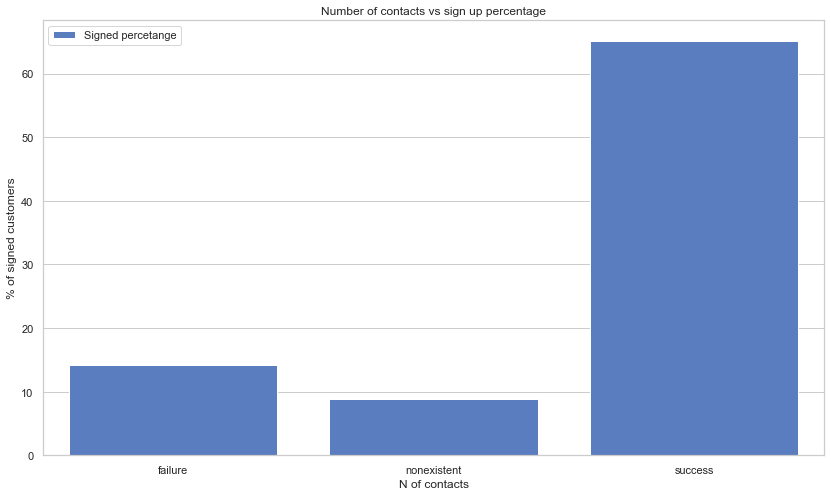

In [33]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 8))
x_labels = list(df["poutcome"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("poutcome")["y"].sum().index, 
            y =  df.groupby("poutcome")["y"].sum()/df.groupby("poutcome")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("N of contacts")
ax.set_ylabel("% of signed customers")
ax.set_title("Number of contacts vs sign up percentage")
plt.savefig("./img/EDA2.png")

In [34]:
# poutcome
df["poutcome"].value_counts(normalize = True)

nonexistent    0.863431
failure        0.103234
success        0.033335
Name: poutcome, dtype: float64

##### types of data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             41188 non-null  object 
 1   marital         41188 non-null  object 
 2   education       41188 non-null  object 
 3   default         41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   campaign        41188 non-null  int64  
 10  pdays           41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  cons.price.idx  41188 non-null  float64
 14  cons.conf.idx   41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  int64  
 17  new_age         41188 non-null 

In [36]:
# # visualize our finalized selection of feature/condition variables with pair grid
# c = ['price', 'bedrooms', 'grade_code', 'age', 'waterfront_coded', 'sqft_living']

# g = sns.PairGrid(df, vars=c)
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.regplot);

### Modeling

In [37]:
# Lets define function to check our models.
def get_score2(df, predict,  model = LogisticRegression(max_iter = 1000),cv = 4, grid_search = False, grid = None):

    
    # Timing, for debugging and comparison purposes
    start = time.time()
    
    # Defince our y and X
    y = df[predict]
    X = df.drop(predict, axis = 1)
    
    
    print(y.value_counts())
    # Split data to train and test. Train data will be used for model validation, test data for model verification.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
    
    # Define our model
    model_used = model
    
    # One hot encode of categorical data. There is no numerical in this dataset so we will OHE before splitting to 
    # train and validation. 
    ohe = OneHotEncoder(drop = 'first', handle_unknown= "ignore")
    ohe.fit(X_train)
    X_train_ohe = pd.DataFrame(ohe.transform(X_train).todense(), columns = ohe.get_feature_names_out())
    X_test_ohe = pd.DataFrame(ohe.transform(X_test).todense(), columns = ohe.get_feature_names_out())

    
    # Imbalance problem
    X_train_sm, y_train_sm = sm.fit_resample(X_train_ohe, y_train)
    
    cv_results = cross_validate(model_used, X = X_train_sm, y = y_train_sm, scoring = ["recall", "accuracy"], cv = StratifiedKFold(n_splits=cv), return_train_score=True, return_estimator = True)
    estimator = cv_results["estimator"][0]
    train_accuracy =np.mean(cv_results["train_accuracy"]) 
    train_recall = np.mean(cv_results["train_recall"]) 
    validation_accuracy = np.mean(cv_results["test_accuracy"]) 
    validation_recall = np.mean(cv_results["test_recall"]) 
    fit_time = np.mean(cv_results["fit_time"])
    
    # Predictions
    y_train_hat = estimator.predict(X_train_sm)
    y_test_hat = estimator.predict(X_test_ohe)
    
    # Test results
    test_accuracy = accuracy_score(y_test, y_test_hat)
    test_recall = recall_score(y_test, y_test_hat)
    
    print(f"Train accuracy: {train_accuracy}")
    print(f"Train recall: {train_recall}")
    print(f"Validation accuracy: {validation_accuracy}")
    print(f"Validation recall:: {validation_recall}")
    print(f"Test accuracy: {test_accuracy}")
    print(f"test recall: {test_recall}")
    
    print(f"classification_report for test data:")
    
    print(classification_report(y_test, y_test_hat))  
    print(f"confusion matrix:")
    cf = confusion_matrix(y_test, y_test_hat)
    ConfusionMatrixDisplay.from_estimator(estimator = estimator, X = X_test_ohe, y = y_test)
    end = time.time()
    print ("Time elapsed:", end - start)
    
    return (train_accuracy, train_recall, validation_accuracy,validation_recall, test_accuracy, test_recall, end - start, estimator)


In [38]:
def transformation(X_train, X_test):
        # # Initialize basic transformation functions. 
        encoder = OneHotEncoder(handle_unknown='ignore', drop = "first")
        scaler = StandardScaler()

        
        # Numerical columns transformation
        X_train_num = X_train.select_dtypes(include = np.number)
        X_test_num = X_test.select_dtypes(include = np.number)
        scaler.fit(X_train_num) # Train scaler transformer
        
        # Apply scaler to numerical train and test columns.
        # And Recreate dataframe with new data.
        X_train_num_ss = pd.DataFrame(data = scaler.transform(X_train_num), index = X_train_num.index, 
                                      columns = scaler.get_feature_names_out())
        X_test_num_ss = pd.DataFrame(data = scaler.transform(X_test_num), index = X_test_num.index, 
                                      columns = scaler.get_feature_names_out())
 
        # Categorical transformation
        X_train_cat = X_train.select_dtypes(include = [object, 'category'])
        X_test_cat = X_test.select_dtypes(include = [object, 'category'])
        encoder.fit(X_train_cat) # Train categorical transformer on train data
        
        # Apply categorical tranformer to categorical train and test columns.
        # And Recreate dataframe with new data.
        X_train_cat_encoded = pd.DataFrame(data = encoder.transform(X_train_cat).todense(), index = X_train_cat.index, 
                                           columns = encoder.get_feature_names_out())
        X_test_cat_encoded = pd.DataFrame(data = encoder.transform(X_test_cat).todense(), index = X_test_cat.index, 
                                           columns = encoder.get_feature_names_out())
        
        # Combine numerical and categorial columns
        X_train = pd.concat([X_train_num_ss, X_train_cat_encoded], axis = 1)
        X_test = pd.concat([X_test_num_ss, X_test_cat_encoded], axis = 1)
        
        return X_train, X_test

In [39]:
# Define Predictors and predictable variable
y = df["y"]
X = df.drop("y", axis = 1)

In [300]:
# Perform split to Training and testing data
X_new, X_test, y_new, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
# X_test and y_test will be used for the finall validation. 
# X_new will be splitted into train and validation data.

##### Baseline model

In [132]:
# For baseline model

In [269]:
X_ss_oha, not_used = transformation(X_new, X_test)

In [218]:
X_ss_oha.shape

(35009, 63)

In [272]:
logreg = LogisticRegression()
kf = StratifiedKFold(4)

In [273]:
results_baseline = cross_validate(logreg, X = X_ss_oha, y = y_new, cv = kf, scoring = ["accuracy", "recall"])

In [274]:
print("Baseline model mean recall: " , np.mean(list(results_baseline["test_recall"])))
print("Baseline model mean accuracy: " , np.mean(list(results_baseline['test_accuracy'])))

Baseline model mean recall:  0.23482883496347653
Baseline model mean accuracy:  0.9004255507539751


##### Baseline model with class imbalance1

In [275]:
logreg2 = LogisticRegression(class_weight = {1:6, 0:1})
result_baseline_weight = cross_validate(logreg2, X = X_train, y = y_new, cv = kf, scoring = ["accuracy", "recall"])

In [276]:
print("Baseline model with weights mean recall: " , np.mean(list(result_baseline_weight["test_recall"])))
print("Baseline model with weights mean accuracy: " , np.mean(list(result_baseline_weight['test_accuracy'])))

Baseline model with weights mean recall:  0.6001511493541332
Baseline model with weights mean accuracy:  0.8491245218928333


##### Baseline model with class imbalance1

In [277]:
sm = SMOTE(sampling_strategy = 0.5, random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_new)
logreg3 = LogisticRegression(class_weight = {1:3, 0:1})
result_baseline_weight_sm= cross_validate(logreg3, X = X_train_sm, y = y_train_sm, cv = kf, scoring = ["accuracy", "recall"])

In [278]:
print("Baseline model with weights and SMOTE mean recall: " , np.mean(list(result_baseline_weight_sm["test_recall"])))
print("Baseline model with weights and SMOTE mean accuracy: " , np.mean(list(result_baseline_weight_sm['test_accuracy'])))

Baseline model with weights and SMOTE mean recall:  0.7364662483459947
Baseline model with weights and SMOTE mean accuracy:  0.7182278840943479


##### Basic models without tuning 

In [282]:
# Lets define function to check our models.
def get_score(X, y,  model = LogisticRegression(max_iter = 1000),cv = kf, grid_search = False, grid = None):

    # Timing, for debugging and comparison purposes
    start = time.time()
    
    # Define our model
    model_used = model
    print(f"Model {model_used} calculations:")
    
    # One hot encode of categorical data. There is no numerical in this dataset so we will OHE before splitting to 
    # train and validation. 
    X_train, X_test_funct= transformation(X, X_test)
    
    # Imbalance problem
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y)
    
    cv_results = cross_validate(model_used, X = X_train_sm, y = y_train_sm, scoring = ["recall", "accuracy"], cv = cv, return_train_score=True, return_estimator = True)
    estimator = cv_results["estimator"][0]
    train_accuracy =np.mean(cv_results["train_accuracy"]) 
    train_recall = np.mean(cv_results["train_recall"]) 
    validation_accuracy = np.mean(cv_results["test_accuracy"]) 
    validation_recall = np.mean(cv_results["test_recall"]) 
    fit_time = np.mean(cv_results["fit_time"])
    
    # Predictions
#    y_train_hat = estimator.predict(X_train_sm)
    y_test_hat = estimator.predict(X_test_funct)
    
    # Test results
    test_accuracy = accuracy_score(y_test, y_test_hat)
    test_recall = recall_score(y_test, y_test_hat)
    
#     print(f"Train accuracy: {train_accuracy}")
#     print(f"Train recall: {train_recall}")
#     print(f"Validation accuracy: {validation_accuracy}")
#     print(f"Validation recall:: {validation_recall}")
#     print(f"Test accuracy: {test_accuracy}")
#     print(f"test recall: {test_recall}")
    
#     print(f"classification_report for test data:")
    
# #     print(classification_report(y_test, y_test_hat))  
# #     print(f"confusion matrix:")
# #     cf = confusion_matrix(y_test, y_test_hat)
# #     ConfusionMatrixDisplay.from_estimator(estimator = estimator, X = X_test_ohe, y = y_test)
    end = time.time()
    print ("Time elapsed:", end - start)
    
    return (train_accuracy, train_recall, validation_accuracy,validation_recall, test_accuracy, test_recall, end - start, estimator)


In [310]:
Model_list = {"Gaussian Naive Bayes":GaussianNB(),"Logistic Regression": LogisticRegression(class_weight = {1:3, 0:1}), "Decision tree": DecisionTreeClassifier(class_weight = {1:3, 0:1}) ,
              "Random Forest": RandomForestClassifier(class_weight = {1:3, 0:1}),  "Gradient Boosting":GradientBoostingClassifier() ,
             "Ada Boost":AdaBoostClassifier()}

In [314]:
sm = SMOTE(sampling_strategy = 0.5, random_state = 42)

columns_df = ["Model name", "Train accuracy", "Train recall", "Validation accuracy", "Validation recall", "Test accuracy", "Test recall", "Execution time"]
Different_models_imbalance_1 = pd.DataFrame(columns = columns_df)

for key, value in Model_list.items():
    results = get_score(X_new, y_new, value);
    line = pd.DataFrame(np.array([[key, round(results[0], 4), round(results[1], 4), round(results[2], 4), round(results[3], 4), round(results[4],4), round(results[5],4), round(results[6],4)]]), columns = columns_df)
    Different_models_imbalance_1 = pd.concat([Different_models_imbalance_1,line], axis = 0)

Model GaussianNB() calculations:
Time elapsed: 1.263598918914795
Model LogisticRegression(class_weight={0: 1, 1: 3}) calculations:
Time elapsed: 2.146850109100342
Model DecisionTreeClassifier(class_weight={0: 1, 1: 3}) calculations:
Time elapsed: 2.173898935317993
Model RandomForestClassifier(class_weight={0: 1, 1: 3}) calculations:
Time elapsed: 19.410176992416382
Model GradientBoostingClassifier() calculations:
Time elapsed: 25.88552761077881
Model AdaBoostClassifier() calculations:
Time elapsed: 9.867873907089233


In [315]:
Different_models_imbalance_1

,Model name,Train accuracy,Train recall,Validation accuracy,Validation recall,Test accuracy,Test recall,Execution time
0,Gaussian,0.762,0.5025,0.7598,0.4979,0.8374,0.4922,1.2636
0,Logistic Regression,0.7199,0.7389,0.7182,0.7365,0.7008,0.699,2.1469
0,Decision tree,0.9924,0.9985,0.8695,0.8169,0.878,0.1883,2.1739
0,Random Forest,0.9932,0.9948,0.9138,0.8306,0.8935,0.1641,19.4102
0,Gradient Boosting,0.9048,0.7913,0.8791,0.719,0.8958,0.1384,25.8855
0,Ada Boost,0.8567,0.7014,0.8388,0.6475,0.8877,0.291,9.8679


In [304]:
xz = GaussianNB()

In [305]:
xz.fit(X_ss_oha, y_new)

GaussianNB()

In [306]:
xz.predict

<bound method _BaseNB.predict of GaussianNB()>

In [41]:
# Initialize kfold
kf = KFold(5)

In [42]:
X_train_cat = X_new.select_dtypes(include = [object, 'string'])


In [43]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35009 entries, 30436 to 15795
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          35009 non-null  object
 1   marital      35009 non-null  object
 2   education    35009 non-null  object
 3   default      35009 non-null  object
 4   housing      35009 non-null  object
 5   loan         35009 non-null  object
 6   contact      35009 non-null  object
 7   month        35009 non-null  object
 8   day_of_week  35009 non-null  object
 9   poutcome     35009 non-null  object
 10  new_age      35009 non-null  object
dtypes: object(11)
memory usage: 3.2+ MB


In [287]:
def Model_CV(X_new, y_new, model = LogisticRegression()):
    # prepare the list of results
    Recall_train_list = []
    Recall_test_list = []
    Accuracy_train_list = []
    Accuracy_test_list = []
    model_input = LogisticRegression()
    for train_index, test_index in kf.split(X_new): #We defined kf before. 
        X_train, X_test = X_new.iloc[train_index,:], X_new.iloc[test_index,:]
        y_train, y_test = y_new.iloc[train_index], y_new.iloc[test_index]
        
        # Data transormation based on previous function
        X_train, X_test = transformation(X_train, X_test)

        #Modeling
        model = model_input          # Define our model based on function inputs
        model.fit(X_train, y_train)  # Train the model based on train data. 
        y_train_hat = model.predict(X_train)  # Predict Y train
        y_test_hat = model.predict(X_test)    # Preduct Y test
        
        #Calculate scores
        Accuracy_train = accuracy_score(y_train, y_train_hat)
        Accuracy_test = accuracy_score(y_test, y_test_hat)
        Recall_train = recall_score(y_train, y_train_hat)
        Recall_test = recall_score(y_test, y_test_hat)
        
        #Add scores for each split into overall list of scores
        Accuracy_train_list.append(Accuracy_train)
        Accuracy_test_list.append(Accuracy_test)
        Recall_train_list.append(Recall_train)
        Recall_test_list.append(Recall_test)
    
    # Find mean values and standard deviation of test scores.
    print(f"Accuracy train {np.mean(Accuracy_train_list)}")
    print(f"Accuracy test {np.mean(Accuracy_test_list)}")
    print(f"Recall train {np.mean(Recall_train_list)}")
    print(f"Recall test {np.mean(Recall_test_list)}")
    cm = confusion_matrix(y_test, y_test_hat)
    ConfusionMatrixDisplay(confusion_matrix = cm).plot()
    plot_roc_curve(model, X_test, y_test)

In [92]:
roc_curve(y_test, y_test_hat)




(array([0.       , 0.0137141, 1.       ]),
 array([0.        , 0.23038605, 1.        ]),
 array([2, 1, 0]))

### Solving inbalance problem

In [ ]:
# In our original dataset records with injuries represent around 15%
# We will use 3 strategies:  
# 1) Increase this proportion of injury crash records by artificial creating samples (SMOTE)
# to 50% and increase the weight of such records to 2 compare to weight 1 for crash records without injuries

Model_list = {"Logistic Regression": LogisticRegression(class_weight = {1:2, 0:1}, max_iter = 1000), "Decision tree": DecisionTreeClassifier(class_weight = {1:2, 0:1}) ,
              "Random Forest": RandomForestClassifier(class_weight = {1:2, 0:1}), "Naive Bayes":MultinomialNB(), "Gradient Boosting":GradientBoostingClassifier() ,
             "Ada Boost":AdaBoostClassifier(), "XGBClassifier" :XGBClassifier(class_weight = {1:2, 0:1}, use_label_encoder=False)}



In [ ]:
sm = SMOTE(sampling_strategy = 0.5, random_state = 42)

columns_df = ["Model name", "Train accuracy", "Train recall", "Validation accuracy", "Validation recall", "Test accuracy", "Test recall", "Execution time"]
Different_models_imbalance_1 = pd.DataFrame(columns = columns_df)
for key, value in Model_list.items():
    results = get_score2(injury_1, "modif_INJURIES_TOTAL", value);
    line = pd.DataFrame(np.array([[key, round(results[0], 4), round(results[1], 4), round(results[2], 4), round(results[3], 4), round(results[4],4), round(results[5],4), round(results[6],4)]]), columns = columns_check)
    Different_models_imbalance_1 = pd.concat([Different_models_imbalance_1,line], axis = 0)



In [ ]:
# Results for imbalance problem solution: SMOTE 50%, class weight 2-1

Different_models_imbalance_1

In [ ]:
# 2) Increase proportion of injury crash records by artificial creating samples (SMOTE) to 50%
# We won't change the weight of classes.

In [ ]:
Model_list = {"Logistic Regression": LogisticRegression(max_iter = 1000), "Decision tree": DecisionTreeClassifier() ,
              "Random Forest": RandomForestClassifier(), "Naive Bayes":MultinomialNB(), "Gradient Boosting":GradientBoostingClassifier() ,
             "Ada Boost":AdaBoostClassifier(), "XGBClassifier" :XGBClassifier(use_label_encoder=False)}


In [ ]:
sm = SMOTE(sampling_strategy = 0.5, random_state = 42)

columns_df = ["Model name", "Train accuracy", "Train recall", "Validation accuracy", "Validation recall", "Test accuracy", "Test recall", "Execution time"]
Different_models_imbalance_2 = pd.DataFrame(columns = columns_df)
for key, value in Model_list.items():
    results = get_score2(injury_1, "modif_INJURIES_TOTAL", value);
    line = pd.DataFrame(np.array([[key, round(results[0], 4), round(results[1], 4), round(results[2], 4), round(results[3], 4), round(results[4],4), round(results[5],4), round(results[6],4)]]), columns = columns_check)
    Different_models_imbalance_2 = pd.concat([Different_models_imbalance_2,line], axis = 0)


In [ ]:
# Results for imbalance problem solution: SMOTE 50%

Different_models_imbalance_2

In [ ]:
# 3) Increase proportion of injury crash records by artificial creating samples (SMOTE) to 100%
# We won't change the weight of classes.

In [ ]:
Model_list = {"Logistic Regression": LogisticRegression(max_iter = 1000), "Decision tree": DecisionTreeClassifier() ,
              "Random Forest": RandomForestClassifier(), "Naive Bayes":MultinomialNB(), "Gradient Boosting":GradientBoostingClassifier() ,
             "Ada Boost":AdaBoostClassifier(), "XGBClassifier" :XGBClassifier(use_label_encoder=False)}


In [ ]:
sm = SMOTE(sampling_strategy = 1, random_state = 42)

columns_df = ["Model name", "Train accuracy", "Train recall", "Validation accuracy", "Validation recall", "Test accuracy", "Test recall", "Execution time"]
Different_models_imbalance_3 = pd.DataFrame(columns = columns_df)
for key, value in Model_list.items():
    results = get_score2(injury_1, "modif_INJURIES_TOTAL", value);
    line = pd.DataFrame(np.array([[key, round(results[0], 4), round(results[1], 4), round(results[2], 4), round(results[3], 4), round(results[4],4), round(results[5],4), round(results[6],4)]]), columns = columns_check)
    Different_models_imbalance_3 = pd.concat([Different_models_imbalance_3,line], axis = 0)


In [ ]:
# Results for imbalance problem solution: SMOTE 100%
Different_models_imbalance_3

In [ ]:
# The best models so far:
# Linear regression, naive bayese

In [ ]:
# Loop with changing prediction bondaries
list_of_thresholds = list(np.linspace(0.2, 0.8, 13))
list_of_options=[]
for threshold in list_of_thresholds:
    prediction_new = [1 if x > threshold else 0 for x in predictions]
    test_accuracy = round(accuracy_score(test_images_labels, prediction_new),4)
    test_recall = round(recall_score(test_images_labels, prediction_new),4)
    list_of_options.append((threshold, test_accuracy, test_recall))
    

# Base model predictions
print("Optimization focusen on accuracy")
print(f"Model accuracy {test_accuracy_base}. Model recall {test_recall_base}")


# Best prediction threshold for accuracy
threshold_acc = sorted(list_of_options, key = lambda x: x[1], reverse = True)[0]
print("Optimization focusen on accuracy")
print(f"Model accuracy {threshold_acc[1]}. Model recall {threshold_acc[2]}")


# Best prediction threshold for recall
threshold_recall = sorted(list_of_options, key = lambda x: x[2], reverse = True)[0]
print("Optimization focusen on recall")
print(f"Model accuracy {threshold_recall[1]}. Model recall {threshold_recall[2]}")



In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, KFold, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [ ]:
df.info()

### EDA 

In [ ]:
# Car crashes/car crashes with injuries and months
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 8))
x_labels = list(df["education"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("education")["y"].sum().index, 
            y =  df.groupby("education")["y"].sum()/df.groupby("education")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("Level of education")
ax.set_ylabel("% of signed customers")
ax.set_title("Dependancy of education to the percentage of sign up people")
plt.savefig("./img/EDA1.png")


In [ ]:
# This section is commented to save computation time.
# Finall dataframe after reading 3 databases and joining is saved in pickle file.

# Read main dataframe containing major informatio about car crashes
# df = pd.read_csv("Traffic_Crashes_-_Crashes.csv")
# df.shape
# # read  dataframe containing additional information about people in crases
# df2 = pd.read_csv("Traffic_Crashes_-_People (1).csv", low_memory=False)
# df2.shape
# # read  dataframe containing additional information about cars in crases
# df_car = pd.read_csv("Traffic_Crashes_-_Vehicles.csv", low_memory=False)
# df_car.shape

In [ ]:
# This section is commented to save computation time.
# Finall dataframe after reading 3 databases and joining is saved in pickle file.

# Check size of dataframes
# print(f"N of features in dataframe 1 - {df.shape[1]}")
# print(df.columns)
# print(f"N of features in dataframe 2 - {df2.shape[1]}")
# print(df2.columns)
# print(f"N of features in dataframe 2 - {df_car.shape[1]}")
# print(df_car.columns)

In [ ]:
# This section is commented to save computation time.
# Finall dataframe after reading 3 databases and joining is saved in pickle file.

# Make new dataframe using previous data
# df_raw = pd.concat([df, df2, df_car], axis = 1, join = "inner" , keys = "CRASH_RECORD_ID")
# df_raw.columns = df_raw.columns.droplevel(0)
# df_raw = df_raw.loc[:,~df_raw.columns.duplicated()]

# Save data in pickle file for further steps
# with open('./data/df_raw.pickle', 'wb') as df_raw_pickled:   
#                 pickle.dump(df_raw, df_raw_pickled, pickle.HIGHEST_PROTOCOL)
# print("Pickled") 

# We will make additional branch of Geo Data only
#geo_columns = ["CRASH_RECORD_ID", "INJURIES_TOTAL", "INJURIES_FATAL", "INJURIES_INCAPACITATING", "LATITUDE", "LONGITUDE", "CRASH_MONTH", "CRASH_HOUR"]
#df_geo = df_raw[geo_columns]
# df_export = df_geo.copy()
# with pd.ExcelWriter('geo.xlsx') as writer:  
#     df_export.to_excel(writer, sheet_name='Sheet_name_1')


### Data inspection

In [ ]:
# Check data for columns with high percentage of low representation.
# If column has less more than 30% of missing data we will consider removing it using the common sense.
# Another filter - how many possible parameters for each column we have.
def checker(df):
    for column in df.columns:
        print(f"{round((1-df[column].isna().sum()/len(df[column]))*100, 2)}% of data exist, N of unique parameters: {len(df[column].value_counts().keys())} in column {column}")

print("Car crash dataframe:")        
checker(df_raw)

In [ ]:
# inspect some data columns
df_raw["CRASH_DATE"]

In [ ]:
# inspect values in each column one by one
df_raw["BEAT_OF_OCCURRENCE"].value_counts()

### Data cleaning

In [ ]:
# Based on this data we will form several lists to drop garbage data that: Too high count of unique values, too much info missing, 
# not relevant info (based on studies in this field), interrelated, dublicates etc. 
# We will make it in 4 variables so we can see which dataframe it related

df_to_drop = ["RD_NO", 'CRASH_DATE_EST_I', 'CRASH_DATE',"LANE_CNT", "REPORT_TYPE", "ALIGNMENT", 'INTERSECTION_RELATED_I',
              'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', "DATE_POLICE_NOTIFIED", "STREET_NO", "STREET_DIRECTION", "STREET_NAME", 
              "BEAT_OF_OCCURRENCE", "PHOTOS_TAKEN_I", "STATEMENTS_TAKEN_I", "DOORING_I", "WORK_ZONE_TYPE", "WORKERS_PRESENT_I", 
              'LATITUDE', 'LONGITUDE', 'LOCATION', "WORK_ZONE_I", "CRASH_TYPE"]
df2_to_drop = ["PERSON_ID", "PERSON_TYPE", "RD_NO", "VEHICLE_ID", "CRASH_DATE", "SEAT_NO", "CITY", "ZIPCODE", "DRIVERS_LICENSE_STATE", 
               "HOSPITAL", "INJURY_CLASSIFICATION", "EMS_AGENCY", "EMS_RUN_NO" , "DRIVER_ACTION", "PEDPEDAL_ACTION","BAC_RESULT", 
               'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'EJECTION', "CELL_PHONE_USE", "AGE"]
df3_to_drop = ["CRASH_UNIT_ID", 'RD_NO', 'CRASH_DATE', 'UNIT_NO', "VEHICLE_ID", 'CMRC_VEH_I', 'MAKE', 'MODEL', 'LIC_PLATE_STATE','VEHICLE_TYPE', 
               'VEHICLE_USE', 'TRAVEL_DIRECTION', 'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
               'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
               'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
               'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I', 'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
               'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
               'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
               'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
               'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
               'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
               'TRAILER1_WIDTH', 'TRAILER2_WIDTH', 'TRAILER1_LENGTH',
               'TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT', 'VEHICLE_CONFIG',
               'CARGO_BODY_TYPE', 'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I',
               'MCS_OUT_OF_SERVICE_I', 'HAZMAT_CLASS', "MANEUVER", "UNIT_TYPE"]

df_to_drop_check= ["SEC_CONTRIBUTORY_CAUSE", 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION','INJURIES_UNKNOWN']



##### Lets see the results of our cleaning

In [ ]:
print("Before features removal")
print(f"N of features in dataframe 1 : {df_raw.shape[1]}, number of records {df_raw.shape[0]}")
df_raw = df_raw.drop(df_to_drop + df_to_drop_check + df2_to_drop + df3_to_drop, axis = 1)

In [ ]:
print("After features removal")
print(f"N of features in dataframe 1 : {df_raw.shape[1]}, number of records {df_raw.shape[0]}")
df_checkpoint = df_raw.copy()


In [ ]:
print(df_raw.columns)

In [ ]:
df_raw.isna().mean()

### Filling missing values and features engineering

To make our model work we need to fill missing values and perform binning of some categorical values.
For example our POSTED_SPEED_LIMIT column consist of 29 unique values, that is far our of range usual speed limit signs on roads.

In [ ]:
# fill missing values :
df_raw["INJURIES_TOTAL"] = df_raw["INJURIES_TOTAL"].fillna(0)
df_raw["INJURIES_INCAPACITATING"] = df_raw["INJURIES_INCAPACITATING"].fillna(0)
df_raw["INJURIES_FATAL"] = df_raw["INJURIES_FATAL"].fillna(0)
df_raw["MOST_SEVERE_INJURY"] = df_raw["MOST_SEVERE_INJURY"].fillna("NO INDICATION OF INJURY")
df_raw["VEHICLE_YEAR"] = df_raw.VEHICLE_YEAR.fillna(2020) # We will use actual year.
df_raw["SEX"] = df_raw["SEX"].fillna("M")
# Age group was removed from our exploring during later stages due to high amount of missing values
#df_raw["AGE"] = df_raw.AGE.fillna(np.random.normal(loc = np.mean(df_raw.AGE[df_raw.AGE > 0]), scale = np.std(df_raw.AGE[df_raw.AGE > 0])))
df_raw["NUM_PASSENGERS"] = df_raw.NUM_PASSENGERS.fillna(0)



Next step will be making bins for data, so we can divide split data into several categories and reduce dimensionality.

In [ ]:
# Speed limits might look like a numerical value, but it represented not by actual speed of car but by speed sign.
# It will be considered categorical value.
# Speed limits:
# Parking, low speed zones <= 15
# Small streets roads: 15-25
# Urban roads: 25-30
# Low speed soze<=20
# High speed zone> 30

def speed_zone(x):
    if (x > 25) and (x <= 30):
        return "URBAN"
    elif (x > 15) and (x <= 25):
        return "CITY STREETS"
    elif x <= 15 :
        return "PARKIN"   
    else:
        return "HIGHWAY"

In [ ]:
# Device condition transformaion

def device_condition(x):
    if (x == "NO CONTROLS") or (x == "FUNCTIONING PROPERLY") or (x == "UNKNOWN"):
        return 1
    else:
        return 0

# Controls device type
def controls(x):
    signs = ["STOP SIGN/FLASHER", "OTHER REG. SIGN", "OTHER WARNING SIGN", "PEDESTRIAN CROSSING SIGN", "YIELD"]
    if (x == "NO CONTROLS"):
        return "NO_CONTROL"
    elif (x == "TRAFFIC SIGNAL") or (x == "FLASHING CONTROL SIGNAL"):
        return "TRAFFIC SIGNAL"
    elif x in signs:
        return "SIGN"
    else:
        return "OTHERS"
    
    

In [ ]:
# Transformation of categorical data that can exist or not exist 
# Like if there damaged road it turns to 1, if road is good - 0

def normality_check(x):
    if (x == normal_condition) or (x == "UNKNOWN"):
        return 1
    else:
        return 0
   

def normality_check_more(x):
    if (x >= more_condition):
        return 1
    else:
        return 0
    
def normality_check_less(x):
    x = int(x)
    if (x < less_condition):
        return 1
    else:
        return 0

In [ ]:
# we will store columns that we change in list change_column_list
change_column_list = []

# POSTED SPEED LIMIT TRANSFORMATION
df_raw["modif_SPEED_ZONE"] = df_raw.POSTED_SPEED_LIMIT.map(speed_zone).astype("category")
change_column_list.append("POSTED_SPEED_LIMIT")

# TRAFFIC CONTROL DEVICE TRANSFORMATION
df_raw["modif_TRAFFIC_CONTROL"] = df_raw.TRAFFIC_CONTROL_DEVICE.map(controls).astype("category")
df_raw["modif_is_TRAFFIC_CONTROL_working"] = df_raw.DEVICE_CONDITION.map(device_condition)
change_column_list.append("TRAFFIC_CONTROL_DEVICE")
change_column_list.append("DEVICE_CONDITION")


In [ ]:
# DAMAGE, SEX modification
df_raw["modif_sex"] = df_raw.SEX.astype("category")
df_raw["modif_DAMAGE"] = df_raw.DAMAGE.astype("category")
change_column_list.append("SEX")
change_column_list.append("DAMAGE")

In [ ]:
# WEATHER_CONDITION , LIGHTING_CONDITION, ROADWAY_SURFACE_COND, ROAD_DEFECT,
normal_condition = "CLEAR"
df_raw["modif_is_weather_clear"] = df_raw.WEATHER_CONDITION.map(normality_check)
change_column_list.append("WEATHER_CONDITION")

normal_condition = "DAYLIGHT"
df_raw["modif_DAYLIGHT"] = df_raw.LIGHTING_CONDITION.map(normality_check)
change_column_list.append("LIGHTING_CONDITION")

normal_condition = "DRY"
df_raw["modif_DRY_ROAD"] = df_raw.ROADWAY_SURFACE_COND.map(normality_check)
change_column_list.append("ROADWAY_SURFACE_COND")

normal_condition = "NO DEFECTS"
df_raw["modif_NO_ROAD_DEFECT"] = df_raw.ROAD_DEFECT.map(normality_check)
change_column_list.append("ROAD_DEFECT")


In [ ]:
# Trafficway types
def Trafficway(x):
    if (x == "NOT DIVIDED") or (x == "UNKNOWN") or (x == "OTHER"):
        return "NOT_DIVIDED "
    elif (x == "DIVIDED - W/MEDIAN BARRIER") or (x == "DIVIDED - W/MEDIAN (NOT RAISED)"):
        return "DIVIDED"
    elif (x == "ONE-WAY"): 
        return "ONE-WAY"
    elif (x == "FOUR WAY") or (x == "T-INTERSECTION") or (x == "CENTER TURN LANE") or (x == "UNKNOWN INTERSECTION TYPE") or (x == "Y-INTERSECTION") or (x =="L-INTERSECTION"):
        return "INTERSECTION"
    elif (x == "PARKING LOT"):
        return "PARKING"
    else:
        return "OTHER"

df_raw["modif_ROAD_TYPE"] = df_raw.TRAFFICWAY_TYPE.map(Trafficway).astype("category")
change_column_list.append("TRAFFICWAY_TYPE")

    

In [ ]:
# number of units
def num_of_units(x):
    if x == 2:
        return "2"
    elif x == 1:
        return "1"
    else:
        return "MULTIPLE"

df_raw["modif_NUM_UNITS"] = df_raw.NUM_UNITS.map(num_of_units).astype("category")
change_column_list.append("NUM_UNITS")

In [ ]:
# time of accident:
def accident_time(x):
    x = int(x)
    if ((x >= 0) and (x < 6)) or ((x >= 21) and (x < 24)):
        return "NIGHT"
    elif ((x >= 6) and (x < 12)):
        return "MORNING"
    elif ((x >= 12) and (x < 18)):
        return "DAY"
    else:
        return "EVENING"
    
# Day of week:
def day(x):
    if (x <= 5):
        return 1
    else:
        return 0
    
# Crush_month to season:
# Chicago has well distinguisher 4 seasons:


def month_tr(x):
    if x == 12 or (x < 3):
        return "WINTER"
    elif x < 6:
        return "SPRING"
    elif x < 9:
        return "SUMMER"
    else:
        return "AUTUMN"

df_raw["modif_CRASH_HOUR"] = df_raw.CRASH_HOUR.map(accident_time).astype("category")
df_raw["modif_WEEKDAY"] = df_raw.CRASH_DAY_OF_WEEK.map(day)
df_raw["modif_SEASON"] = df_raw.CRASH_MONTH.map(month_tr).astype("category")
change_column_list.append("CRASH_HOUR")
change_column_list.append("CRASH_DAY_OF_WEEK")
change_column_list.append("CRASH_MONTH")


In [ ]:
# Check injuries
def injury_transform(x):
    if x == 0:
        return 0
    if x >= 1:
        return 1

df_raw["modif_INJURIES_TOTAL"] = df_raw["INJURIES_TOTAL"].map(injury_transform)   
change_column_list.append("INJURIES_TOTAL")



In [ ]:
# State transform. IL or other states
normal_condition = "IL"
df_raw["modif_HOME_STATE_DRIVER"] = df_raw["STATE"].map(normality_check)
change_column_list.append("STATE")


In [ ]:
# Driver vision. Normal or other
normal_condition = "NOT OBSCURED"
df_raw["modif_NO_VISION_PROBLEMS"] = df_raw["DRIVER_VISION"].map(normality_check)
change_column_list.append("DRIVER_VISION")


In [ ]:
# SAFETY_EQUIPMENT. Normal or other
def safety(x):
    if (x == "USAGE UNKNOWN")  or (x == "SAFETY BELT USED"):
        return "SEFETY BELT"
    elif (x == "SAFETY BELT NOT USED")  or (x == "HELMET NOT USED"):
        return "NOT USED"
    else:
        return "NOT EXIST"

df_raw["modif_SAFETY_EQUIPMENT"] = df_raw["SAFETY_EQUIPMENT"].map(safety).astype("category")
change_column_list.append("SAFETY_EQUIPMENT")


In [ ]:
# Was removed due to lack of information.
# # FILL missing values for age with random samples from normal distribution with mean - current age mean, and std - current age standard deviation
# bins_age = [1, 15,18, 20, 25, 30,40,50,60,70,80,90,100]
# df_raw["modif_AGE"] = pd.cut(x = df_raw.AGE, bins = bins_age)
# df_raw["modif_AGE"] = df_raw["modif_AGE"].fillna()
# df_raw["modif_AGE"] = df_raw["modif_AGE"].astype("category")
# change_column_list.append("AGE")


In [ ]:
# Driver licence
normal_condition = "D"
df_raw["modif_D_DRIVING_LICENCE"] = df_raw["DRIVERS_LICENSE_CLASS"].map(normality_check)
change_column_list.append("DRIVERS_LICENSE_CLASS")

In [ ]:
def physical_cond(x):
    impared = ["IMPAIRED - DRUGS", "IMPAIRED - ALCOHOL AND DRUGS", "MEDICATED", "HAD BEEN DRINKING", "IMPAIRED - ALCOHOL", "REMOVED BY EMS"]
    other = ["FATIGUED/ASLEEP", "OTHER", "EMOTIONAL", "ILLNESS/FAINTED"]
    if x == "NORMAL":
        return "NORMAL"
    elif x in impared:
        return "IMPARED"
    elif x in other:
        return "OTHER"
    else:
        return "UNKNOWN"

df_raw["modif_PHYSICAL_CONDITION_modif"] = df_raw["PHYSICAL_CONDITION"].map(physical_cond).astype("category")        
change_column_list.append("PHYSICAL_CONDITION")


In [ ]:
# https://super.stanford.edu/alcohol-drug-info/buzz-buzz/what-bac
# .13 - .15	Gross impairment of motor control. Blurred vision and major loss of balance. Onset of dysphoria (anxiety, restlessness).
# .40 and up Onset of coma. Likelihood of death due to respiratory failure.
def is_heavy_drunk(x):
    if x >= 0.13:
        return 1
    else:
        return 0
    
df_raw["modif_Heavy_drunk"] = df_raw["BAC_RESULT VALUE"].map(is_heavy_drunk)
change_column_list.append("BAC_RESULT VALUE")



In [ ]:
df_raw.columns

In [ ]:
# N of passengers - normality_check_more with 0:
# VEHICLE_DEFECT - normalint_check with "NONE"
# VEHICLE_YEAR - normalint_check less, with 2012 (estimated 100 000 miles with 12 000 miles/year)
# AIRBAG deployed

normal_condition = 0
df_raw["modif_No_PASSANGERS"] = df_raw.NUM_PASSENGERS.map(normality_check)
change_column_list.append("NUM_PASSENGERS")

more_condition = 2
df_raw["modif_multiple_passangers"] = df_raw.NUM_PASSENGERS.map(normality_check_more)
normal_condition = "NONE"
df_raw["modif_NO_CAR_DEFFECT"] = df_raw.VEHICLE_DEFECT.map(normality_check)
change_column_list.append("VEHICLE_DEFECT")


less_condition = 2012
df_raw["modif_IS_OLD_CAR"] = df_raw.VEHICLE_YEAR.map(normality_check_less)
change_column_list.append("VEHICLE_YEAR")


df_raw["modif_IS_AIRBAG_DEPLOYED"] = df_raw.AIRBAG_DEPLOYED.map(lambda x: 1 if "DEPLOYED" in x else 0)
change_column_list.append("AIRBAG_DEPLOYED")

In [ ]:
# columns without change

df_raw["modif_INJURIES_FATAL"] = df_raw["INJURIES_FATAL"]
df_raw["modif_INJURIES_INCAPACITATING"] = df_raw["INJURIES_INCAPACITATING"]
change_column_list.append("INJURIES_FATAL")
change_column_list.append("MOST_SEVERE_INJURY")
change_column_list.append("INJURIES_INCAPACITATING")


In [ ]:
# columns without change
df_raw["modif_PRIM_CONTRIBUTORY_CAUSE"] = df_raw["PRIM_CONTRIBUTORY_CAUSE"].astype("category")
change_column_list.append("PRIM_CONTRIBUTORY_CAUSE")

In [ ]:
# Remove joint column
change_column_list.append("CRASH_RECORD_ID")


In [ ]:
df_fin =df_raw.drop(change_column_list, axis = 1)

In [ ]:
df_fin.info()

In [ ]:
# Check for missing values and column type:
for column in df_fin.columns:
    print(f"N of missing values : {df_fin[column].isna().sum()}, column type : {df_fin[column].dtype},  column name: {column}")

### Now our data is ready and we can proceed with data exploration and data modeling

# Data Exploration

### Lets check how many crashes with different types of injuries we have

In [ ]:
df_geo_inj = df_fin[df_fin["modif_INJURIES_TOTAL"] > 0]
df_geo_fatal = df_fin[df_fin["modif_INJURIES_FATAL"] > 0]
df_geo_inc = df_fin[df_fin["modif_INJURIES_INCAPACITATING"] > 0]


# Investigate how many crashes with injuries:
Percentage_inj = round(df_geo_inj.shape[0]/df_fin.shape[0]*100, 1)

# Investigate how many crashes with fatalities
Percentage_fat = round(df_geo_fatal.shape[0]/df_geo_inj.shape[0]*100, 1)

# Incapacitating injuries
Percentage_inc = round(df_geo_inc.shape[0]/df_geo_inj.shape[0]*100, 1)

print(f"Car crashes with injures represent {Percentage_inj}% of all car crashes")
print(f"Incapacitating injuries represent {Percentage_inc}% of all car crashes with injuries")
print(f"Fatal injuries represent {Percentage_fat}% of all car crashes with injuries, in 2021 happened {df_geo_fatal.shape[0]} fatal car crashes")

###  Lets see the dependancies that influence injuries

In [ ]:
# influence of different factors to injuries
for reason in list(df_fin.columns):
    if reason != "FIRST_CRASH_TYPE":
        
        overall = df_fin.groupby(reason).count()["FIRST_CRASH_TYPE"]
        with_reason = df_fin[df_fin["modif_INJURIES_TOTAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
        result = with_reason/overall
        print(result)


### Lets see dependancy between car crashes with injuries and type of road

In [ ]:
# Car crashes/car crashes with injuries and different types of roads
reason = "modif_ROAD_TYPE"
overall = df_fin.groupby(reason).count()["FIRST_CRASH_TYPE"]
with_reason = df_fin[df_fin["modif_INJURIES_TOTAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
heavy_injuries = df_fin[df_fin["modif_INJURIES_INCAPACITATING"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
fatal_injuries = df_fin[df_fin["modif_INJURIES_FATAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
result = with_reason/overall*100
result2 = heavy_injuries/overall*100
result3 = fatal_injuries/overall*100

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))
sns.set_color_codes("pastel")
sns.barplot(x = result.index, 
            y =  result, 
            color="b", label = "Crashes with injuries")
sns.set_color_codes("muted")
sns.barplot(x = result2.index, 
            y =  result2, 
            color="b", label = "Incapacitating injuries")
sns.barplot(x = result3.index, 
            y =  result3, 
            color="r", label = "fatal injuries")
ax.legend(loc="upper left", frameon=True)
ax.set_xlabel("Type of road")
ax.set_ylabel("Percentage of injuries")
ax.set_title("Car crashes with injuries for different types of roads")
plt.savefig("./img/Injuries_road_types.png")


### Influence of light to car crashes

In [ ]:
# Was it good lightning or not?

reason = "modif_DAYLIGHT"
overall = df_fin.groupby(reason).count()["FIRST_CRASH_TYPE"]
with_reason = df_fin[df_fin["modif_INJURIES_TOTAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
heavy_injuries = df_fin[df_fin["modif_INJURIES_INCAPACITATING"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
fatal_injuries = df_fin[df_fin["modif_INJURIES_FATAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
result = with_reason/overall*100
result2 = heavy_injuries/overall*100
result3 = fatal_injuries/overall*100

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(4, 8))
sns.set_color_codes("pastel")
sns.barplot(x = result.index, 
            y =  result, 
            color="b", label = "Crashes with injuries")
sns.set_color_codes("muted")
sns.barplot(x = result2.index, 
            y =  result2, 
            color="b", label = "Incapacitating injuries")
sns.barplot(x = result3.index, 
            y =  result3, 
            color="r", label = "fatal injuries")

ax.legend( loc="upper right", frameon=True)
ax.set_xlabel("Type of lightning")
ax.set_ylabel("Percentage of injuries")
ax.set_title("Car crashes with different lightning")
x_labels = ["Bad light", "Good Light"]
ax.set_xticklabels(x_labels)
plt.savefig("./img/Injuries_lightning.png")



In [ ]:
# Different time of the day

reason = "modif_CRASH_HOUR"
overall = df_fin.groupby(reason).count()["FIRST_CRASH_TYPE"]
with_reason = df_fin[df_fin["modif_INJURIES_TOTAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
heavy_injuries = df_fin[df_fin["modif_INJURIES_INCAPACITATING"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
fatal_injuries = df_fin[df_fin["modif_INJURIES_FATAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
result = with_reason/overall*100
result2 = heavy_injuries/overall*100
result3 = fatal_injuries/overall*100

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 8))
sns.set_color_codes("pastel")
sns.barplot(x = result.index, 
            y =  result, 
            color="b", label = "Crashes with injuries")
sns.set_color_codes("muted")
sns.barplot(x = result2.index, 
            y =  result2, 
            color="b", label = "Incapacitating injuries")
sns.barplot(x = result3.index, 
            y =  result3, 
            color="r", label = "fatal injuries")

ax.legend(loc="upper left", frameon=True)
ax.set_xlabel("Time of the day")
ax.set_ylabel("Percentage of injuries")
ax.set_title("Car crashes with injuries for different time of the day")
plt.savefig("./img/Injuries_time_of_day.png")

### Seatbelt

In [ ]:
reason = "modif_SAFETY_EQUIPMENT"
overall = df_fin.groupby(reason).count()["FIRST_CRASH_TYPE"]
with_reason = df_fin[df_fin["modif_INJURIES_TOTAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
heavy_injuries = df_fin[df_fin["modif_INJURIES_INCAPACITATING"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
fatal_injuries = df_fin[df_fin["modif_INJURIES_FATAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
result = with_reason/overall*100
result2 = heavy_injuries/overall*100
result3 = fatal_injuries/overall*100

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 8))
sns.set_color_codes("pastel")
sns.barplot(x = result.index, 
            y =  result, 
            color="b", label = "Crashes with injuries")
sns.set_color_codes("muted")
sns.barplot(x = result2.index, 
            y =  result2, 
            color="b", label = "Incapacitating injuries")
sns.barplot(x = result3.index, 
            y =  result3, 
            color="r", label = "fatal injuries")
ax.legend(loc="upper right", frameon=True)
ax.set_xlabel("Does a car have a seat belt")
ax.set_ylabel("Percentage of injuries")
ax.set_title("Car crashes with injuries using seatbelt")
plt.savefig("./img/Injuries_seatbelt.png")

### Traffic control

In [ ]:
# Car crashes/car crashes with injuries and different types of roads
reason = "modif_TRAFFIC_CONTROL"
overall = df_fin.groupby(reason).count()["FIRST_CRASH_TYPE"]
with_reason = df_fin[df_fin["modif_INJURIES_TOTAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
heavy_injuries = df_fin[df_fin["modif_INJURIES_INCAPACITATING"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
fatal_injuries = df_fin[df_fin["modif_INJURIES_FATAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
result = with_reason/overall*100
result2 = heavy_injuries/overall*100
result3 = fatal_injuries/overall*100

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))
sns.set_color_codes("pastel")
sns.barplot(x = result.index, 
            y =  result, 
            color="b", label = "Crashes with injuries")
sns.set_color_codes("muted")
sns.barplot(x = result2.index, 
            y =  result2, 
            color="b", label = "Incapacitating injuries")
sns.barplot(x = result3.index, 
            y =  result3, 
            color="r", label = "Fatal injuries")
ax.legend(loc="upper left", frameon=True)
ax.set_xlabel("Type of road")
ax.set_ylabel("Percentage of injuries")
ax.set_title("Car crashes with injuries for different types of traffic control devices")
plt.savefig("./img/Injuries_traffic control.png")

### Lets see dependancy between car crashes and months of year.

In [ ]:
# Car crashes/car crashes with injuries and months
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 8))
x_labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.set_color_codes("pastel")
sns.barplot(data = df_checkpoint, x = df_checkpoint.groupby("CRASH_MONTH")["INJURIES_TOTAL"].count().index, 
            y =  df_checkpoint.groupby("CRASH_MONTH")["INJURIES_TOTAL"].count(), 
            color="b", label = "Total crashes")
sns.set_color_codes("muted")
sns.barplot(data = df_checkpoint, x = df_checkpoint[df_checkpoint["INJURIES_TOTAL"] > 0].groupby("CRASH_MONTH")["INJURIES_TOTAL"].count().index, 
            y =  df_checkpoint[df_checkpoint["INJURIES_TOTAL"] > 0].groupby("CRASH_MONTH")["INJURIES_TOTAL"].count(), 
            color = "b", label = "Crashes with injuries")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("Month")
ax.set_ylabel("N of car crashes")
ax.set_title("Car crashes per month")
ax.set_xticklabels(x_labels);
plt.savefig("./img/Car_crashes_per_month.png")



In [ ]:

# Car car crashes with different injuries and months
fig, ax = plt.subplots(figsize=(14, 8))
x_labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.set_color_codes("pastel")
sns.barplot(data = df_checkpoint, x = df_checkpoint[df_checkpoint["INJURIES_TOTAL"] > 0].groupby("CRASH_MONTH")["INJURIES_TOTAL"].count().index, 
            y =  df_checkpoint[df_checkpoint["INJURIES_TOTAL"] > 0].groupby("CRASH_MONTH")["INJURIES_TOTAL"].count(), 
            color = "b", label = "Crashes with injuries")
sns.set_color_codes("muted")
sns.barplot(data = df_checkpoint, x = df_checkpoint[df_checkpoint["INJURIES_TOTAL"] > 0].groupby("CRASH_MONTH")["INJURIES_INCAPACITATING"].count().index, 
            y =  df_checkpoint[df_checkpoint["INJURIES_INCAPACITATING"] > 0].groupby("CRASH_MONTH")["INJURIES_INCAPACITATING"].count(), 
            color = "b", label = "Incapacitating injuries")
sns.barplot(data = df_checkpoint, x = df_checkpoint[df_checkpoint["INJURIES_TOTAL"] > 0].groupby("CRASH_MONTH")["INJURIES_FATAL"].count().index, 
            y =  df_checkpoint[df_checkpoint["INJURIES_FATAL"] > 0].groupby("CRASH_MONTH")["INJURIES_FATAL"].count(), 
            color = "r", label = "fatal injuries")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("Month")
ax.set_ylabel("N of car crashes")
ax.set_title("Car crashes with injuries per month")
ax.set_xticklabels(x_labels);
plt.savefig("./img/Car_crasheswithinjuries_per_month.png")


# Data Modeling

In [ ]:
injury_1 = df_fin.copy()

injury_1 = injury_1.drop("modif_INJURIES_FATAL", axis =1)
injury_1 = injury_1.drop("modif_INJURIES_INCAPACITATING", axis =1)

injury_1.modif_INJURIES_TOTAL.value_counts(normalize = True)

In [ ]:
# Lets define function to check our models.
def get_score2(df, predict,  model = LogisticRegression(max_iter = 1000),cv = 3, grid_search = False, grid = None):

    
    # Timing, for debugging and comparison purposes
    start = time.time()
    
    # Defince our y and X
    y = df[predict]
    X = df.drop(predict, axis = 1)
    
    
    print(y.value_counts())
    # Split data to train and test. Train data will be used for model validation, test data for model verification.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    
    # Define our model
    model_used = model
    
    # One hot encode of categorical data. There is no numerical in this dataset so we will OHE before splitting to 
    # train and validation. 
    ohe = OneHotEncoder(drop = 'first', handle_unknown= "ignore")
    ohe.fit(X_train)
    X_train_ohe = pd.DataFrame(ohe.transform(X_train).todense(), columns = ohe.get_feature_names_out())
    X_test_ohe = pd.DataFrame(ohe.transform(X_test).todense(), columns = ohe.get_feature_names_out())
    
    
    
    # Imbalance problem
    X_train_sm, y_train_sm = sm.fit_resample(X_train_ohe, y_train)
    
    cv_results = cross_validate(model_used, X = X_train_sm, y = y_train_sm, scoring = ["recall", "accuracy"], cv = StratifiedKFold(n_splits=cv), return_train_score=True, return_estimator = True)
    estimator = cv_results["estimator"][0]
    train_accuracy =np.mean(cv_results["train_accuracy"]) 
    train_recall = np.mean(cv_results["train_recall"]) 
    validation_accuracy = np.mean(cv_results["test_accuracy"]) 
    validation_recall = np.mean(cv_results["test_recall"]) 
    fit_time = np.mean(cv_results["fit_time"])
    
    # Predictions
    y_train_hat = estimator.predict(X_train_sm)
    y_test_hat = estimator.predict(X_test_ohe)
    
    # Test results
    test_accuracy = accuracy_score(y_test, y_test_hat)
    test_recall = recall_score(y_test, y_test_hat)
    
    print(f"Train accuracy: {train_accuracy}")
    print(f"Train recall: {train_recall}")
    print(f"Validation accuracy: {validation_accuracy}")
    print(f"Validation recall:: {validation_recall}")
    print(f"Test accuracy: {test_accuracy}")
    print(f"test recall: {test_recall}")
    
    print(f"classification_report for test data:")
    
    print(classification_report(y_test, y_test_hat))  
    print(f"confusion matrix:")
    cf = confusion_matrix(y_test, y_test_hat)
    ConfusionMatrixDisplay.from_estimator(estimator = estimator, X = X_test_ohe, y = y_test)
    end = time.time()
    print ("Time elapsed:", end - start)
    
    return (train_accuracy, train_recall, validation_accuracy,validation_recall, test_accuracy, test_recall, end - start, estimator)



In [ ]:
# Lets check performance of our model based on data. 
sm = SMOTE(sampling_strategy = "not minority", random_state = 42)
xc= get_score2(injury_1, "modif_INJURIES_TOTAL");

In [ ]:
# Performance 
# While model has better performance than just predicting all values be the same class, 
# it has low recall that means that it often predict that there was no injury, but it actually happened.
# That could be due to 3 major reasons: 1) Not sufficient data 2) Wrong model used 3) Class imbalance





In [ ]:
# Lets try other models with default values and compare their performance:
Model_list = {"Logistic Regression": LogisticRegression(max_iter = 1000), "Decision tree": DecisionTreeClassifier() ,
              "Random Forest": RandomForestClassifier(), "Naive Bayes":MultinomialNB(), "Gradient Boosting":GradientBoostingClassifier() ,
             "Ada Boost":AdaBoostClassifier(), "XGBClassifier" :XGBClassifier(use_label_encoder=False)}




In [ ]:
columns_check = ["Model name", "Train accuracy", "Train recall", "Validation accuracy", "Validation recall", "Test accuracy", "Test recall", "Execution time"]
sm = SMOTE(sampling_strategy = "not minority", random_state = 42)

Different_models = pd.DataFrame(columns = columns_check)
for key, value in Model_list.items():
    results = get_score2(injury_1, "modif_INJURIES_TOTAL", value);
    line = pd.DataFrame(np.array([[key, round(results[0], 4), round(results[1], 4), round(results[2], 4), round(results[3], 4), round(results[4],4), round(results[5],4), round(results[6],4)]]), columns = columns_check)
    Different_models = pd.concat([Different_models,line], axis = 0)

Different_models

In [ ]:
Different_models

In [ ]:
# While all models have low values for Test Recall (our major characteristics), we can see that 2 model
# have better performance. Decision tree tends to overfit on training sample, but still performance is good
# on test sample. Naive Bayese have good recall performance and have better accuracy score on test data





### Solving inbalance problem

In [ ]:
# In our original dataset records with injuries represent around 15%
# We will use 3 strategies:  
# 1) Increase this proportion of injury crash records by artificial creating samples (SMOTE)
# to 50% and increase the weight of such records to 2 compare to weight 1 for crash records without injuries

Model_list = {"Logistic Regression": LogisticRegression(class_weight = {1:2, 0:1}, max_iter = 1000), "Decision tree": DecisionTreeClassifier(class_weight = {1:2, 0:1}) ,
              "Random Forest": RandomForestClassifier(class_weight = {1:2, 0:1}), "Naive Bayes":MultinomialNB(), "Gradient Boosting":GradientBoostingClassifier() ,
             "Ada Boost":AdaBoostClassifier(), "XGBClassifier" :XGBClassifier(class_weight = {1:2, 0:1}, use_label_encoder=False)}



In [ ]:
sm = SMOTE(sampling_strategy = 0.5, random_state = 42)

columns_df = ["Model name", "Train accuracy", "Train recall", "Validation accuracy", "Validation recall", "Test accuracy", "Test recall", "Execution time"]
Different_models_imbalance_1 = pd.DataFrame(columns = columns_df)
for key, value in Model_list.items():
    results = get_score2(injury_1, "modif_INJURIES_TOTAL", value);
    line = pd.DataFrame(np.array([[key, round(results[0], 4), round(results[1], 4), round(results[2], 4), round(results[3], 4), round(results[4],4), round(results[5],4), round(results[6],4)]]), columns = columns_check)
    Different_models_imbalance_1 = pd.concat([Different_models_imbalance_1,line], axis = 0)



In [ ]:
# Results for imbalance problem solution: SMOTE 50%, class weight 2-1

Different_models_imbalance_1

In [ ]:
# 2) Increase proportion of injury crash records by artificial creating samples (SMOTE) to 50%
# We won't change the weight of classes.

In [ ]:
Model_list = {"Logistic Regression": LogisticRegression(max_iter = 1000), "Decision tree": DecisionTreeClassifier() ,
              "Random Forest": RandomForestClassifier(), "Naive Bayes":MultinomialNB(), "Gradient Boosting":GradientBoostingClassifier() ,
             "Ada Boost":AdaBoostClassifier(), "XGBClassifier" :XGBClassifier(use_label_encoder=False)}


In [ ]:
sm = SMOTE(sampling_strategy = 0.5, random_state = 42)

columns_df = ["Model name", "Train accuracy", "Train recall", "Validation accuracy", "Validation recall", "Test accuracy", "Test recall", "Execution time"]
Different_models_imbalance_2 = pd.DataFrame(columns = columns_df)
for key, value in Model_list.items():
    results = get_score2(injury_1, "modif_INJURIES_TOTAL", value);
    line = pd.DataFrame(np.array([[key, round(results[0], 4), round(results[1], 4), round(results[2], 4), round(results[3], 4), round(results[4],4), round(results[5],4), round(results[6],4)]]), columns = columns_check)
    Different_models_imbalance_2 = pd.concat([Different_models_imbalance_2,line], axis = 0)


In [ ]:
# Results for imbalance problem solution: SMOTE 50%

Different_models_imbalance_2

In [ ]:
# 3) Increase proportion of injury crash records by artificial creating samples (SMOTE) to 100%
# We won't change the weight of classes.

In [ ]:
Model_list = {"Logistic Regression": LogisticRegression(max_iter = 1000), "Decision tree": DecisionTreeClassifier() ,
              "Random Forest": RandomForestClassifier(), "Naive Bayes":MultinomialNB(), "Gradient Boosting":GradientBoostingClassifier() ,
             "Ada Boost":AdaBoostClassifier(), "XGBClassifier" :XGBClassifier(use_label_encoder=False)}


In [ ]:
sm = SMOTE(sampling_strategy = 1, random_state = 42)

columns_df = ["Model name", "Train accuracy", "Train recall", "Validation accuracy", "Validation recall", "Test accuracy", "Test recall", "Execution time"]
Different_models_imbalance_3 = pd.DataFrame(columns = columns_df)
for key, value in Model_list.items():
    results = get_score2(injury_1, "modif_INJURIES_TOTAL", value);
    line = pd.DataFrame(np.array([[key, round(results[0], 4), round(results[1], 4), round(results[2], 4), round(results[3], 4), round(results[4],4), round(results[5],4), round(results[6],4)]]), columns = columns_check)
    Different_models_imbalance_3 = pd.concat([Different_models_imbalance_3,line], axis = 0)


In [ ]:
# Results for imbalance problem solution: SMOTE 100%
Different_models_imbalance_3

In [ ]:
# Display all results:
print("Imbalance problem 0.85/0.15")
display(Different_models) 
print("SMOTE 0.5, weight 1:2")
display(Different_models_imbalance_1) 
print("SMOTE 0.5")
display(Different_models_imbalance_2) 
print("SMOTE 1")
display(Different_models_imbalance_3) 



In [ ]:
# The best models so far:
# Linear regression, naive bayese

### Adjusting hyper parameters

Reminder: We are focused on maximizing recall of our model.

We will adjust parameters for the following models:
1) Logistic regression:
+ This model shows good recall score with solved imbalance problem.
+ This models tend not to overfit
+ This model is easy to interprete, so we can find what parameters influence the most our prediction. 

2) Naive Bayese:
+ This model shows the best recall score with solved imbalance problem.
+ This models tend not to overfit
+ Speed performance allows us to make parameters tune within short period of time


##### Naive Bayese hyperparameters tuning 

In [ ]:
# Lets start with Naive Bayes
# Define function that we will use in our model
def hyper_tune(df, predict,  model = LogisticRegression(max_iter = 1000), cv = 3, grid = None):
    # Timing, for debugging and comparison purposes
    start = time.time()
    
    # Defince our y and X
    y = df[predict]
    X = df.drop(predict, axis = 1)
    
    # Split data to train and test. Train data will be used for model validation, test data for model verification.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    
    # Define our model
    model_used = model
    
    # One hot encode of categorical data. There is no numerical in this dataset so we will OHE before splitting to 
    # train and validation. 
    ohe = OneHotEncoder(drop = 'first', handle_unknown= "ignore")
    ohe.fit(X_train)
    X_train_ohe = pd.DataFrame(ohe.transform(X_train).todense(), columns = ohe.get_feature_names_out())
    X_test_ohe = pd.DataFrame(ohe.transform(X_test).todense(), columns = ohe.get_feature_names_out())
    
    # Imbalance problem
    X_train_sm, y_train_sm = sm.fit_resample(X_train_ohe, y_train)
    
    # GridSearch
    grid_results = GridSearchCV(estimator = model, param_grid = grid, scoring = ("recall", "accuracy"), refit = "recall")
    grid_results.fit(X_train_sm, y_train_sm)
    
    return (grid_results, X_test_ohe, y_test)






In [ ]:
# Define class imbalance problem solving strategy as number 3 that we used before.
sm = SMOTE(sampling_strategy = 1, random_state = 42)
model = MultinomialNB()
tune_grid = {"alpha":[0.01, 0.1, 0.5, 1, 10]}

results = hyper_tune(injury_1, "modif_INJURIES_TOTAL", model, cv = 4, grid = tune_grid)


In [ ]:
# Best parameters for our prediction model
print(f"Best parameter:", results[0].best_params_)
print(f"Best recall {results[0].best_score_}")
X_test_recall = recall_score(results[2], results[0].best_estimator_.predict(results[1]))
print(f"prediction on test set:",round(X_test_recall,4))


In [ ]:
# Lets try different modification of Naive Bayes from SKLearn library
# ComplementNB, BernoulliNB, GaussianNB

In [ ]:
# ComplementNB
sm = SMOTE(sampling_strategy = 1, random_state = 42)
model = ComplementNB()
tune_grid = {"alpha":[0.01, 0.1, 0.5, 1, 10]}

results = hyper_tune(injury_1, "modif_INJURIES_TOTAL", model, cv = 4, grid = tune_grid)
print(f"Best parameter:", results[0].best_params_)
print(f"Best recall {results[0].best_score_}")
X_test_recall = recall_score(results[2], results[0].best_estimator_.predict(results[1]))
print(f"prediction on test set:",round(X_test_recall,4))

In [ ]:
#BernoulliNB
sm = SMOTE(sampling_strategy = 1, random_state = 42)
model = BernoulliNB()
tune_grid = {"alpha":[0.01, 0.1, 0.5, 1, 10]}

results = hyper_tune(injury_1, "modif_INJURIES_TOTAL", model, cv = 4, grid = tune_grid)
print(f"Best parameter:", results[0].best_params_)
print(f"Best recall {results[0].best_score_}")
X_test_recall = recall_score(results[2], results[0].best_estimator_.predict(results[1]))
print(f"prediction on test set:",round(X_test_recall,4))

In [ ]:
#GaussianNB
sm = SMOTE(sampling_strategy = 1, random_state = 42)
model = GaussianNB()
tune_grid = {"var_smoothing":[0.01, 0.1, 0.5, 1, 10, 100]}

results = hyper_tune(injury_1, "modif_INJURIES_TOTAL", model, cv = 4, grid = tune_grid)
print(f"Best parameter:", results[0].best_params_)
print(f"Best recall {results[0].best_score_}")
X_test_recall = recall_score(results[2], results[0].best_estimator_.predict(results[1]))
print(f"prediction on test set:",round(X_test_recall,4))

In [ ]:
# impressive recall score. Lets check full report to investigate this case in more details.
results[0].cv_results_

In [ ]:
finall_model_selection = pd.DataFrame(columns = columns_df)


In [ ]:
# It might looks like a good result, but we should remember that model performs training/testing splits on modified dataset.
# For finall validation we will check the model using our old function and visially inspect confusion matrix.
# Plug in the values into the function that we used before, to see the full confusion matrix
Model_list = {"Naive Bayes Tuned": GaussianNB(var_smoothing = 0.1)}
sm = SMOTE(sampling_strategy = 1, random_state = 42)

for key, value in Model_list.items():
    resultsNB = get_score2(injury_1, "modif_INJURIES_TOTAL", value);
    line = pd.DataFrame(np.array([[key, round(resultsNB[0], 4), round(resultsNB[1], 4), round(resultsNB[2], 4), round(resultsNB[3], 4), round(resultsNB[4],4), round(resultsNB[5],4), round(resultsNB[6],4)]]), columns = columns_check)
    finall_model_selection = pd.concat([finall_model_selection,line], axis = 0)


##### Logistic regression hyperparameters tuning 

In [ ]:
#  We define our grid and start parameters tuning. 
sm = SMOTE(sampling_strategy = 1, random_state = 42)
model = LogisticRegression()
tune_grid = {"max_iter":[1000],
             "penalty": ["l2", "elasticnet"], 
             "C" : [0.001, 0.01, 0.1, 1, 10, 100],
             "solver":["lbfgs", "saga", "liblinear"]}

results_logistic = hyper_tune(injury_1, "modif_INJURIES_TOTAL", model, cv = 4, grid = tune_grid)

results_logistic[0]

In [ ]:
cv_results = pd.DataFrame(results_logistic[0].cv_results_)


In [ ]:
params_logistic = results_logistic[0].best_params_

In [ ]:
# Parameters of the best logistic regression after search for the best hyper parameters
params_logistic

In [ ]:
Model_list = {"Logistic regression tuned": LogisticRegression(C =0.001, max_iter=1000, penalty="l2", solver = 'liblinear')}
sm = SMOTE(sampling_strategy = 1, random_state = 42)

for key, value in Model_list.items():
    results_logistic_tuned = get_score2(injury_1, "modif_INJURIES_TOTAL", value);
    line = pd.DataFrame(np.array([[key, round(results_logistic_tuned[0], 4), round(results_logistic_tuned[1], 4), round(results_logistic_tuned[2], 4), round(results_logistic_tuned[3], 4), round(results_logistic_tuned[4],4), round(results_logistic_tuned[5],4), round(results_logistic_tuned[6],4)]]), columns = columns_check)
    finall_model_selection = pd.concat([finall_model_selection,line], axis = 0)


### Final model selection:

In [ ]:
final_model = pd.concat([finall_model_selection, 
                        pd.DataFrame(Different_models_imbalance_3.iloc[0]).T, 
                        pd.DataFrame(Different_models_imbalance_3.iloc[1]).T,
                        pd.DataFrame(Different_models_imbalance_3.iloc[3]).T], axis = 0)
final_model

In [ ]:
# Our finall model list include 
# We will proceed with logistic regression tuned (model 2 from our list)
final_model = results_logistic_tuned[7]

# We considered the following:
# 1) Good recall perfromance(our target metrics) with good accuracy score. 
# 2) Well feneralize and perform with unseen data(test data)
# 3) Easy to interprete output factors
# 4) Fast performance. 




In [ ]:
final_model.coef_[0]

#### We will proceed with logistic regression tuned (model 2 from our list)

### Breakdown into different parameters that influence our model performance

In [ ]:

list_factors = []

for i in list(range(len(final_model.feature_names_in_))):
    tu = tuple([final_model.feature_names_in_[i], final_model.coef_[0][i]])
    list_factors.append(tu)
    



In [ ]:
# Negative influence (reduce probablilty of injuries during car crash)
Biggest_negative_influence = sorted(list_factors, key = lambda x : x[1])[:10]



In [ ]:
# Positive influence (increase probablilty of injuries during car crash)

Biggest_influence = sorted(list_factors, key = lambda x : x[1], reverse = True)[:10]

In [ ]:
Biggest_negative_influence = pd.DataFrame(Biggest_negative_influence, columns = ["Reason", "Influence"])

In [ ]:
Biggest_influence = pd.DataFrame(Biggest_influence, columns = ["Reason", "Influence"])

In [ ]:
Biggest_influence

In [ ]:
# Lets make a graph with main contributors
y_labels = ["Crash with Pedestrian", "Crash with pedalcyclist", "Multiple cars(>2)", "Failed to yield right-of-way", "Damage over 1500$", "Speed zone Urban(20-30mph)", "Disregarding traffic signals", "Intersection crash", "Physical condition of driver", "Failing to reduce speed to avoid crash" ]
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(data = Biggest_influence, y = "Reason", x = "Influence", )
ax.set_xlabel("Influence")
ax.set_ylabel("Car crash root")
ax.set_title("Main contributors to car crashes")
ax.set_yticklabels(y_labels);
plt.savefig("./img/Main_contributors.png")


In [ ]:
# Lets make a graph with parameters reduce the probability

y_labels = ["Crash with parked vehicle", "Sideswipe same directon", "Damage 500-1500$", "Crash on parking", "One way road", "2 units crash", "Improper backing", "Parking speed zone(0-15mph)", "Winter", "Crash with rear bumper" ]
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(data = Biggest_negative_influence, y = "Reason", x = "Influence")
ax.set_xlabel("Influence")
ax.set_ylabel("Preventing factors")
ax.set_title("Main factors preventing getting injuries during car crashes")
ax.set_yticklabels(y_labels);
plt.savefig("./img/Main_preventive_factors.png")

# Conclusion
---
For our finalized model we used LinearRegression because of the following reasons: 
1) It is easy to interprete.

2) It have good recall compared to the other models, without much sacrifice in precision. 


Overall, this data tells us that injuries during car crashes can be predicted and we can see tha major factors that influence it. These modeling results correspond to our observations during data exploration phase